#  Hub Airports, airports with the most routes with Folium and Cartopy

In [1]:
import pandas as pd
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Cartopy static map
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Folium
import folium

## Get the data : airport and routes dataset

https://openflights.org/data.html

In [2]:
names = ('id,name,city,country,iata,icao,lat,long,alt,timezone,dst,tz,type,source').split(',')
airports = pd.read_csv("data/airports.dat", header= None, names=names,  na_values='\\N')
airports.id = airports.id.astype(str)
airports.head(3)

,id,name,city,country,iata,icao,lat,long,alt,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [3]:
names = ('airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment').split(',')
routes = pd.read_csv("data/routes.dat", names=names, header=None)
routes = routes.fillna(0)
routes.head(3)

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,0,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,0,CR2


## Build the main dataframe : calcultate  traffic by Airport

In [4]:
airport_source = routes['source_id'].value_counts()
airport_dest = routes['dest_id'].value_counts()

In [5]:
traffic = pd.DataFrame(columns = ['source_id', 'dest_id','sumtraffic'])
traffic['source_id'] = airport_source
traffic['dest_id'] = airport_dest
traffic = traffic.fillna(0)
traffic['dest_id'] = traffic['dest_id'].astype('int64')
traffic['dest_id'] = traffic['dest_id'].astype('int64')
traffic['sumtraffic'] = traffic.apply(lambda x: x['source_id'] + x['dest_id'], axis=1)
traffic.head()

,source_id,dest_id,sumtraffic
3682,915,911,1826
3830,558,550,1108
3364,535,534,1069
507,527,524,1051
1382,524,517,1041


In [6]:
traffic['id'] = traffic.index
traffic['id'] =traffic['id']
traffic.head()

,source_id,dest_id,sumtraffic,id
3682,915,911,1826,3682
3830,558,550,1108,3830
3364,535,534,1069,3364
507,527,524,1051,507
1382,524,517,1041,1382


In [7]:
traffic_final = airports.merge(traffic, on="id", how = 'inner')
traffic_final.head(3)

,id,name,city,country,iata,icao,lat,long,alt,timezone,dst,tz,type,source,source_id,dest_id,sumtraffic
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports,5,5,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports,8,8,16
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports,10,12,22


In [8]:
traffic_final = traffic_final[['id','name','lat','long','sumtraffic']]
traffic_final = traffic_final.set_index('id',drop = True)
traffic_final.sort_values(['sumtraffic'], ascending=[0])
traffic_final= traffic_final.loc[traffic_final['sumtraffic'] > 600].sort_values(['sumtraffic'],ascending = False)
traffic_final.head()

,name,lat,long,sumtraffic
id,,,,
3682,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1826
3830,Chicago O'Hare International Airport,41.978600,-87.904800,1108
3364,Beijing Capital International Airport,40.080101,116.584999,1069
507,London Heathrow Airport,51.470600,-0.461941,1051
1382,Charles de Gaulle International Airport,49.012798,2.550000,1041


# Plot Airports with the most traffic with Matplotlib

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

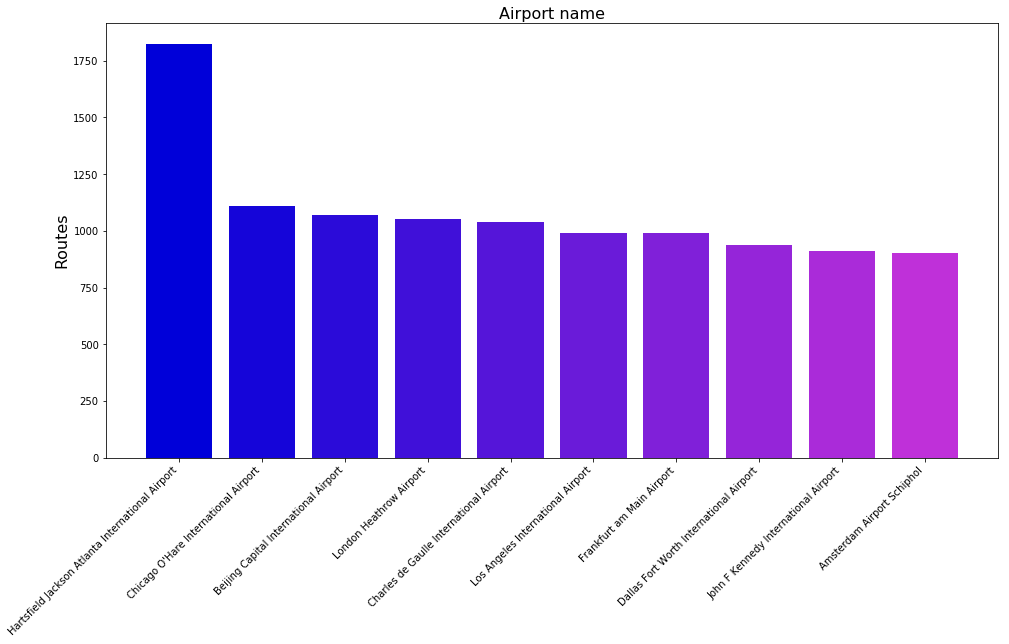

In [9]:
traffic_top= traffic_final.loc[traffic_final['sumtraffic'] > 900]

# Set color transparency (0: transparent; 1: solid)
a = 0.4
# Create a colormap
customcmap = [(x/12.0,  x/48.0, 0.85) for x in range(len(traffic_top))]
    
# Create a figure of given size
fig = plt.figure(figsize=(16,8))
# Add a subplot
ax = fig.add_subplot(111)
# Plot
ax.bar(traffic_top['name'], traffic_top['sumtraffic'],color=customcmap)
# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Airport name'
ax.set_xlabel(xlab, fontsize=16)
# Set y axis label, set label text
ylabel = 'Routes'
ax.set_ylabel(ylabel, fontsize=16)
# Labels rotation
plt.xticks(rotation=45, ha='right')

# Plot result on interactive map with folium

In [10]:
m = folium.Map(location=[48.86, 2.33],zoom_start=2 )

In [11]:
for i in range(0,len(traffic_final)):
    lat = traffic_final.iloc[i]['lat']
    lon = traffic_final.iloc[i]['long']
    name = traffic_final.iloc[i]['name']
    size = traffic_final.iloc[i]['sumtraffic']
    folium.CircleMarker([lat, lon], radius=size/50,color='red' , popup=name+'<br>Routes : '+str(size),
        fill_color='red').add_to(m)

In [12]:
m

![title](images/traffic_aiport.png)

# Plot result on static map with cartopy

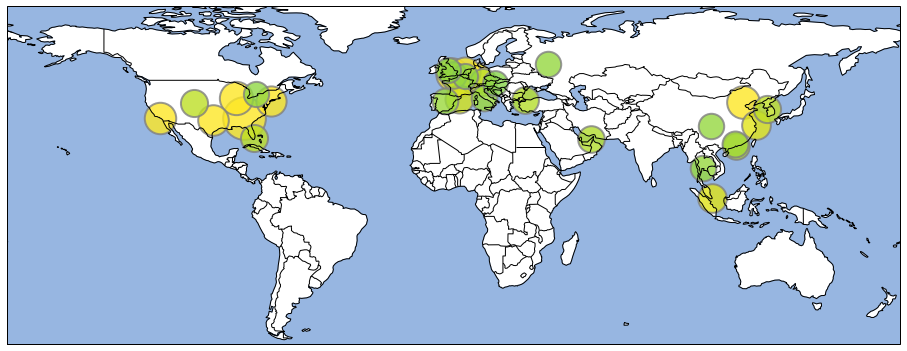

In [13]:
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
from matplotlib import cm

num_airports = len(traffic_final)

# normalize the dataset for color scale
norm = PowerNorm(0.3, traffic_final['sumtraffic'].min(),traffic_final['sumtraffic'].max())

n = num_airports
cmap = cm.get_cmap('viridis')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-110, 110, -28, 60])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

for index, row in traffic_final.iterrows():
     color = norm(row.sumtraffic*2)
     ax.scatter(row.long, row.lat, s=row.sumtraffic,c=[cmap(color)], alpha=0.8, edgecolors="grey", label=color, linewidth=2)

#ax.legend()